# Price Elasticity  
  
### Applications in Retail  
  
The purpose of this notebook is to describe two applications of elasticity.  

* **Price Elasticity of Demand**
* **Cross Price Elasticity**  
  




Contents
1. Definitions of Elasticity
2. Definition of Demand Model
3. Types of Problems
4. Other Variables
5. Fitting the Demand Model
6. Intepretation of Results
7. Applications in Retail
8. Code References

## 1. Definitions of Elasticity

**General Definition**  
  
An assumption is that variable B is dependant on variable A, this dependency can be denoted as
 
$$_{B=f(A...)}$$

Where the dots `.` represents additional variables as well as `A`.  
Then it is possible to define the elasticity `e` of `B` with respect to `A` as  
  
$$e_{B,A}= {\text{percent change in B} \over \text{percent change in A}} = {\Delta B/B \over \Delta A/A} = {\partial B \over \partial A}{A \over B}  $$
<br>  
**Price Elasticity of Demand**  
Change in price `P` of item `a` will lead to a change in quantity purchased `Q` of item `a` is denoted  
  
$$e_{Q_a,P_a}= {\text{percent change in Q of item a} \over \text{percent change in P of item a}} = {\partial Q_a \over \partial P_a}{P_a \over Q_a}  $$
<br>  
**Cross Price Elasticity of Demand**  
Change in price `P` of item `b` will lead to a change in quantity purchased `Q` of item `a` is denoted  
  
$$e_{Q_a,P_b}= {\text{percent change in Q of item a} \over \text{percent change in P of item b}} = {\partial Q_a \over \partial P_b}{P_b \over Q_a}  $$

If item `a` and item `b` are cross substituties the cross price elasticity will be positive, when these items are complements it will be negative.
<br>  
**Intepretion of Elasticity on a Demand Curve**  
  
\begin{array}{ccc}
{\text{Value of  }} e_{Q_a,P_a} {\text{at a Point}}&{\text{Terminology of Curve at This Point}}\\
e_{Q_a,P_a<-1}&{\text{Elastic}}\\
e_{Q_a,P_a=-1}&{\text{Unit elastic}}\\
e_{Q_a,P_a>-1}&{\text{Inelastic}}\\
\end{array} 


References:  
*Microeconomic Theory, Walter Nicholson 2002*  

Formula Latex code source:  
https://upmath.me/

Now we look at an example of Price Elasticity of Demand using `python`

In [6]:
import pandas as pd
import numpy as np

# generate three dates of Q, P for an item
dict_of_lists = {'date': ['2021-12-01','2021-12-02','2021-12-03','2021-12-04'],
                 'Q' : [12, 14, 18, 19], 
                 'P': [6, 5, 4, 3]}

df = pd.DataFrame(dict_of_lists).set_index('date')
df.head()

,Q,P
date,,
2021-12-01,12,6
2021-12-02,14,5
2021-12-03,18,4
2021-12-04,19,3


We can use `pandas` method `.pct_change()` to calculate percentage change of `Q` and `P` from one date (row) to another.

In [7]:
df['Q_pct_change'] = df['Q'].pct_change()
df['P_pct_change'] = df['P'].pct_change()
df

,Q,P,Q_pct_change,P_pct_change
date,,,,
2021-12-01,12,6,NaN,NaN
2021-12-02,14,5,0.166667,-0.166667
2021-12-03,18,4,0.285714,-0.200000
2021-12-04,19,3,0.055556,-0.250000


$${\text{Value of  }} e_{Q_a,P_a} {\text{ calculated using percent change in Q and P in 2021-12-02 compared to 2021-12-01  }}$$

In [8]:
print(f'Price elasticity of demand in 2021-12-02 is: {0.166667 / -0.166667}')

Price elasticity of demand in 2021-12-02 is: -1.0


The interpretation of this is that point at point 2021-12-02 the value is **Unit elastic**.  
In other words, a 16.66667% **decrease in P** leads to a 16.66667% **increase in Q**.  
  
We can calculate this for the next date also and add these results to the table as follows.

In [9]:
df['elasticity'] = df['Q_pct_change'] / df['P_pct_change']
df

,Q,P,Q_pct_change,P_pct_change,elasticity
date,,,,,
2021-12-01,12,6,NaN,NaN,NaN
2021-12-02,14,5,0.166667,-0.166667,-1.000000
2021-12-03,18,4,0.285714,-0.200000,-1.428571
2021-12-04,19,3,0.055556,-0.250000,-0.222222


Adding the `terminology` column to the table based on the Interpretation of Elasticity on a Deman Curve, from above we get the following results:  

In [10]:
df['Terminology'] = 'Unknown'
df.loc[(df['elasticity'] < -1), 'Terminology'] = 'Elastic'
df.loc[(df['elasticity'] > -1.001)&(df['elasticity'] < -0.999), 'Terminology'] = 'Unit Elastic' # Due to float precision limitations in python
df.loc[(df['elasticity'] > -1), 'Terminology'] = 'Inelastic'
df

,Q,P,Q_pct_change,P_pct_change,elasticity,Terminology
date,,,,,,
2021-12-01,12,6,NaN,NaN,NaN,Unknown
2021-12-02,14,5,0.166667,-0.166667,-1.000000,Unit Elastic
2021-12-03,18,4,0.285714,-0.200000,-1.428571,Elastic
2021-12-04,19,3,0.055556,-0.250000,-0.222222,Inelastic


We can see that in point 2021-12-03 the value is **Elastic**.  
In other words, a 20% **decrease in P** leads to a 28.5714% **increase in Q**.  

In this simple example the elasticity changes from one day to another. Depending on which way we choose the elasticity can go from `Unit Elastic`, `Elastic` to `Inelastic`.

## 2. Definition of Demand Model
  
2.1. Linear Demand and Elasticity  
  
2.2. Constant Elasticity Functions
  
</br>  
**2.1. Linear Demand and Elasticity**

The Elasticity of Demand varies along the Straight Line Demand Curve and the previous example values of three observations in `df` can be plotted as below

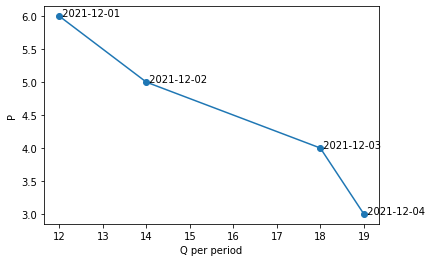

In [11]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines

plt.scatter(df['Q'],df['P'])
plt.plot(df['Q'],df['P'])
plt.text(12,6,' 2021-12-01')
plt.text(14,5,' 2021-12-02')
plt.text(18,4, ' 2021-12-03')
plt.text(19,3,' 2021-12-04',horizontalalignment='left')
plt.xlabel('Q per period')
plt.ylabel('P')
plt.show()

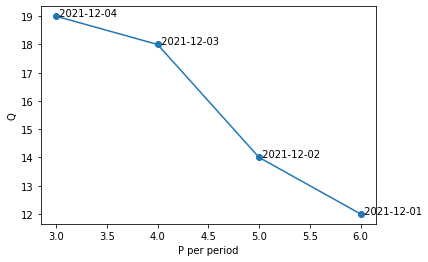

In [16]:
plt.scatter(df['P'],df['Q'])
plt.plot(df['P'],df['Q'])
plt.text(6,12,' 2021-12-01')
plt.text(5,14,' 2021-12-02')
plt.text(4,18, ' 2021-12-03')
plt.text(3,19,' 2021-12-04',horizontalalignment='left')
plt.xlabel('P per period')
plt.ylabel('Q')
plt.show()

**2.2. Constant Elasticity Functions**

Until now we have seen that the elasticity by above given definition varies over time over a linear demand curve. In order of making e.g strategic pricing decisions this it can be usefull to assume that the elasticities where constans over some range of price changes and this would motivate using an exponential demand function and simplifying by taking the natural logarithms. This can be expressed in the following equation:  

$$_{lnQ= \alpha + \beta lnP}$$  
  
This can be re-written as:  
  
$$_{Q= exp[\alpha + \beta lnP]}$$  

Simplified to:  

$$_{Q= e^\alpha + P^\beta}$$  


##3. Types of a problems  
  
There can be two types of problem to be solved by building a demand function.  
  
* "y-hat" problem
* coefficient problem  
  


Read in sample modelling data from file for some items

In [ ]:
from google.colab import files
import io

In [ ]:
# Read in sample data of some items
uploaded = files.upload()
uploaded

Saving 4_key_columns_v2.csv to 4_key_columns_v2 (1).csv


{'4_key_columns_v2.csv': b'key_column,month_of_year_c,quantity_sold_t,days_since_launch_n,service_level_c,store_lw_sales_n,store_l4w_sales_n,store_sales_trend_n,pa_lw_sales_n,pa_l4w_sales_n,pa_sales_trend_n,price_n,discontinued_flag,ignore_discontinued_row_flag,pct_discounted_sales,dropped_items,channel,start_date,end_date,ii_date\n00180124CZ,5,0.0,194,1.0,23289.992857142857,6198.7759259259265,3.7571922481879314,169.28571428571428,47.18518518518518,3.5876878223817,8.589123060803518,0,0,0.18,0,CnC,2019-11-01,2021-10-31,2021-12-02\n00180124ES,5,0.1541506457674607,211,1.0,3516.3333333333335,1432.6,2.4545116105914655,288.7142857142857,95.0,3.039097744360902,4.828073718265662,0,0,0.11,0,CnC,2019-11-01,2021-10-31,2021-12-02\n00180124ES,5,0.0,189,1.0,455.5,235.64285714285714,1.9330100030312216,19.166666666666668,7.5,2.555555555555556,4.828073718265662,0,0,0.11,0,CnC,2019-11-01,2021-10-31,2021-12-02\n00180124ES,8,1.5040773967762742,274,1.0,46735.92833333334,49964.51639999999,0.9353823813520057

In [ ]:
# check
file = '4_key_columns_v2.csv'
print(uploaded[file][0:50])

b'key_column,month_of_year_c,quantity_sold_t,days_si'


In [ ]:
df = pd.read_csv(io.StringIO(uploaded[file].decode('utf-8')))
print(df.shape)
df.head()

(2326, 20)


,key_column,month_of_year_c,quantity_sold_t,days_since_launch_n,service_level_c,store_lw_sales_n,store_l4w_sales_n,store_sales_trend_n,pa_lw_sales_n,pa_l4w_sales_n,pa_sales_trend_n,price_n,discontinued_flag,ignore_discontinued_row_flag,pct_discounted_sales,dropped_items,channel,start_date,end_date,ii_date
0,00180124CZ,5,0.000000,194,1.0,23289.992857,6198.775926,3.757192,169.285714,47.185185,3.587688,8.589123,0,0,0.18,0,CnC,2019-11-01,2021-10-31,2021-12-02
1,00180124ES,5,0.154151,211,1.0,3516.333333,1432.600000,2.454512,288.714286,95.000000,3.039098,4.828074,0,0,0.11,0,CnC,2019-11-01,2021-10-31,2021-12-02
2,00180124ES,5,0.000000,189,1.0,455.500000,235.642857,1.933010,19.166667,7.500000,2.555556,4.828074,0,0,0.11,0,CnC,2019-11-01,2021-10-31,2021-12-02
3,00180124ES,8,1.504077,274,1.0,46735.928333,49964.516400,0.935382,769.428571,854.678571,0.900255,4.820443,0,0,0.11,0,CnC,2019-11-01,2021-10-31,2021-12-02
4,00180124ES,12,0.693147,407,1.0,28636.843333,22550.230800,1.269914,515.857143,447.892857,1.151742,4.828074,0,0,0.11,0,CnC,2019-11-01,2021-10-31,2021-12-02


The variables in the table cotain the follwing columns:
* `key_column` - unique item identifier  
* `quantity_sold_t` - after logarithmic (ln) transformation
* `price_n`- after logarithmic (ln) transformation
* other variables are control variables used to fit a multiple linear regression

In [ ]:
df.describe()

,month_of_year_c,quantity_sold_t,days_since_launch_n,service_level_c,store_lw_sales_n,store_l4w_sales_n,store_sales_trend_n,pa_lw_sales_n,pa_l4w_sales_n,pa_sales_trend_n,price_n,discontinued_flag,ignore_discontinued_row_flag,pct_discounted_sales,dropped_items
count,2326.000000,2326.000000,2326.000000,2326.0,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.000000,2326.0,2326.0,2326.000000,2326.0
mean,6.786328,0.404899,368.579966,1.0,27968.007423,27815.472780,1.059829,427.398897,423.870611,1.062093,5.774626,0.0,0.0,0.132850,0.0
std,3.461295,0.366909,211.907024,0.0,15724.670657,14750.131879,0.497071,306.140578,301.801588,0.440985,1.472898,0.0,0.0,0.044804,0.0
min,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.866468,0.0,0.0,0.110000,0.0
25%,4.000000,0.133531,195.000000,1.0,18772.135417,19032.423036,0.922814,151.857143,149.107143,0.912854,4.828074,0.0,0.0,0.110000,0.0
50%,7.000000,0.336472,372.000000,1.0,29458.772143,29048.564048,0.998397,413.285714,431.821429,1.000000,4.828074,0.0,0.0,0.110000,0.0
75%,10.000000,0.619039,547.000000,1.0,38527.648750,38121.120179,1.083930,681.857143,720.777778,1.081113,6.572688,0.0,0.0,0.130000,0.0
max,12.000000,2.302585,729.000000,1.0,104067.555714,82521.480714,4.351959,1134.857143,1045.392857,4.060630,8.663217,0.0,0.0,0.300000,0.0


In [ ]:
# there are four keys i.e items
unique_keys = df['key_column'].unique()
print(unique_keys)

['00180124CZ' '00180124ES' '00180124RO' '00180124HR']


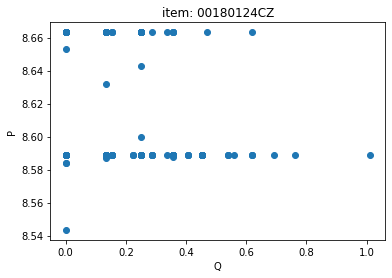

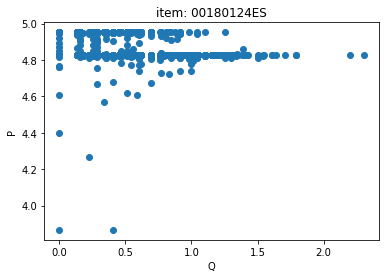

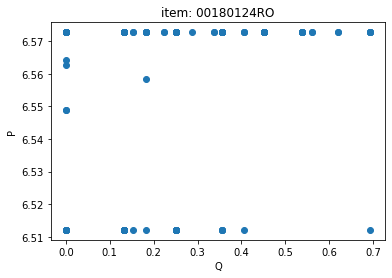

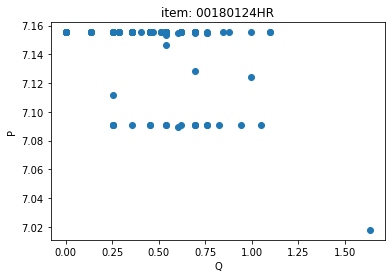

In [ ]:
# Plot the 4 keys P vs Q
for key in unique_keys:
  dat = df[df['key_column']==key]
  x = dat['quantity_sold_t']
  y = dat['price_n']
  plt.scatter(x,y)
  plt.xlabel('Q')
  plt.ylabel('P')
  plt.title(f'item: {key}')
  plt.show()

### Start of Temporary Section
Write a function to check VIF of columns until reach a threshold!

In [ ]:
# Modify ref code to calculate the VIF for each key in the data frame (4 total and print the results)
# This would be the starting point that gives the first VIF values.
# Next would be to repeat this process until all VIF values are below threshold!

from statsmodels.stats.outliers_influence import variance_inflation_factor

fin_num_col_names = ["price_n", "days_since_launch_n", "store_l4w_sales_n", "store_sales_trend_n", "pa_lw_sales_n", "pa_l4w_sales_n", "pa_sales_trend_n"]
num_col = np.asarray(df.loc[:,fin_num_col_names].copy(), dtype=float)

for key in unique_keys:
  dat = df[df['key_column']==key]
  X_num = np.asarray(dat.loc[:,fin_num_col_names].copy(), dtype=float).copy()
  vif_cols = fin_num_col_names.copy()
  vif_data = pd.DataFrame()
  vif_data["feature"] = vif_cols
  vif_data["VIF"] = [variance_inflation_factor(X_num, i) for i in range(len(vif_cols))]
  # print results
  print(f'key: {key}')
  print(f'{vif_data}\n')


# # ---------- VIF calculation ----------
# X_num = np.asarray(df.loc[:,fin_num_col_names].copy(), dtype=float).copy()
# vif_cols = fin_num_col_names.copy()
# vif_data = pd.DataFrame()
# vif_data["feature"] = vif_cols
# vif_data["VIF"] = [variance_inflation_factor(X_num, i) for i in range(len(vif_cols))]

# # ---------- prints of results ------------
# print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


key: 00180124CZ
               feature        VIF
0              price_n  20.592649
1  days_since_launch_n   5.564321
2    store_l4w_sales_n  11.025370
3  store_sales_trend_n  18.107009
4        pa_lw_sales_n  29.356010
5       pa_l4w_sales_n  41.477829
6     pa_sales_trend_n  19.862572

key: 00180124ES
               feature         VIF
0              price_n   74.103064
1  days_since_launch_n    8.284675
2    store_l4w_sales_n    9.180096
3  store_sales_trend_n    9.434159
4        pa_lw_sales_n   82.282293
5       pa_l4w_sales_n  111.857431
6     pa_sales_trend_n   25.840102

key: 00180124RO
               feature        VIF
0              price_n  38.291698
1  days_since_launch_n   7.330454
2    store_l4w_sales_n  14.749595
3  store_sales_trend_n  29.401791
4        pa_lw_sales_n  48.799184
5       pa_l4w_sales_n  60.324740
6     pa_sales_trend_n  32.981278

key: 00180124HR
               feature        VIF
0              price_n  36.788934
1  days_since_launch_n   4.941608
2    st

Thresholds for VIF:  
* VIF < 5 - Good
* 5 =< VIF <= 10 - OK
* VIF > 10 - NOK

In [ ]:
# Continue from here. We want to re-run the VIF calc after we remove the max VIF column

In [ ]:
# Ref to break down row by row step 1-5
# ---------- VIF calculation ----------
X_num = np.asarray(df.loc[:,fin_num_col_names].copy(), dtype=float).copy()
vif_cols = fin_num_col_names.copy()
vif_data = pd.DataFrame()
vif_data["feature"] = vif_cols
vif_data["VIF"] = [variance_inflation_factor(X_num, i) for i in range(len(vif_cols))]

# ---------- prints of results ------------
print(vif_data)

In [ ]:
# Check cols and data type of df
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 24 to 2316
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   key_column                    104 non-null    object 
 1   month_of_year_c               104 non-null    int64  
 2   quantity_sold_t               104 non-null    float64
 3   days_since_launch_n           104 non-null    int64  
 4   service_level_c               104 non-null    float64
 5   store_lw_sales_n              104 non-null    float64
 6   store_l4w_sales_n             104 non-null    float64
 7   store_sales_trend_n           104 non-null    float64
 8   pa_lw_sales_n                 104 non-null    float64
 9   pa_l4w_sales_n                104 non-null    float64
 10  pa_sales_trend_n              104 non-null    float64
 11  price_n                       104 non-null    float64
 12  discontinued_flag             104 non-null    int64  
 13  ign

In [ ]:
# step 1 of 5
print(fin_num_col_names)
print(X_num.shape) # This one has all 7 columns as a start
X_num

['price_n', 'days_since_launch_n', 'store_l4w_sales_n', 'store_sales_trend_n', 'pa_lw_sales_n', 'pa_l4w_sales_n', 'pa_sales_trend_n']
(104, 7)


array([[7.15539630e+00, 5.32000000e+02, 2.90936933e+04, 1.03523899e+00,
        3.25714286e+01, 4.09629630e+01, 7.95143374e-01],
       [7.15539630e+00, 1.19000000e+02, 2.78092257e+04, 9.52263221e-01,
        8.11428571e+01, 9.09285714e+01, 8.92380204e-01],
       [7.15539630e+00, 5.04000000e+02, 2.93458871e+04, 1.08968845e+00,
        4.71428571e+01, 5.31071429e+01, 8.87693342e-01],
       [7.15539630e+00, 3.78000000e+02, 2.96661474e+04, 1.09961406e+00,
        6.22857143e+01, 5.67407407e+01, 1.09772473e+00],
       [7.15539630e+00, 3.43000000e+02, 3.22605293e+04, 1.06537053e+00,
        6.08571429e+01, 6.06785714e+01, 1.00294291e+00],
       [7.15493669e+00, 1.40000000e+01, 3.84735379e+04, 1.00750867e+00,
        8.08571429e+01, 7.99285714e+01, 1.01161752e+00],
       [7.09090982e+00, 6.93000000e+02, 2.94522007e+04, 1.03781456e+00,
        7.65714286e+01, 6.50000000e+01, 1.17802198e+00],
       [7.15539630e+00, 2.10000000e+01, 3.94972752e+04, 1.05183838e+00,
        7.17142857e+01, 7

In [ ]:
# step 2 of 5
vif_cols # These are the same 7 columns as in fin_num_col_names

['price_n',
 'days_since_launch_n',
 'store_l4w_sales_n',
 'store_sales_trend_n',
 'pa_lw_sales_n',
 'pa_l4w_sales_n',
 'pa_sales_trend_n']

In [ ]:
# step 3 of 5
vif_data = pd.DataFrame() # create empty df
print(vif_data)

Empty DataFrame
Columns: []
Index: []


In [ ]:
# step 4 of 5
vif_data["feature"] = vif_cols # set the feature name columns
print(vif_data)                # no values yet

               feature
0              price_n
1  days_since_launch_n
2    store_l4w_sales_n
3  store_sales_trend_n
4        pa_lw_sales_n
5       pa_l4w_sales_n
6     pa_sales_trend_n


In [ ]:
# step 5 of 5
vif_data["VIF"] = [variance_inflation_factor(X_num, i) for i in range(len(vif_cols))] # Run VIF for each column name in the X_sum array
vif_data                          # all the 7 rows of data and the VIF value

,feature,VIF
0,price_n,36.788934
1,days_since_launch_n,4.941608
2,store_l4w_sales_n,39.243788
3,store_sales_trend_n,35.720264
4,pa_lw_sales_n,37.182807
5,pa_l4w_sales_n,50.743397
6,pa_sales_trend_n,53.039007


In [ ]:
# Next step 6 - THIS CAN REMOVE price_n, this we don´t want!
# we want to start removing columns based on VIF value max
# remove feature with highest VIF and store in a new df
vif_data_v2 = vif_data[vif_data["VIF"]!=vif_data["VIF"].max()].reset_index(drop=True)
vif_data_v2    # Removed pa_lw4_sales_n with highest VIF

,feature,VIF
0,price_n,36.788934
1,days_since_launch_n,4.941608
2,store_l4w_sales_n,39.243788
3,store_sales_trend_n,35.720264
4,pa_lw_sales_n,37.182807
5,pa_l4w_sales_n,50.743397


In [ ]:
# Next step 6 new version - This checks that we do not drop price_n - TEST THIS and wrap into a function
vif_data_sorted = vif_data.sort_values(by = 'VIF', ascending=False).reset_index(drop=True)
print(f'Sorted df before removal of feature:\n {vif_data_sorted}\n')
if vif_data_sorted.iloc[0][0] != 'price_n':
  print(f'Removed feature: {vif_data_sorted.iloc[0][0]} with VIF: {vif_data_sorted.iloc[0][1]}\n')
  # Drop the highest VIF feature (index 0)
  vif_data_sorted_reduced = vif_data_sorted.iloc[1:].reset_index(drop=True)
  print(f'Sorted df after removal of feature:\n {vif_data_sorted_reduced}')

else:
  print(f'price_n has highest VIF: {vif_data_sorted.iloc[0][0]} with VIF: {vif_data_sorted.iloc[0][1]}\n')
  print(f'But not allowed to remove the feature: price_n. Removing next feature instead: vif_data_sorted.iloc[1][0]\n')
  # Drop the second highest VIF feature (index 1) instead
  vif_data_sorted_reduced = vif_data_sorted.drop([1], axis=0).reset_index(drop=True)
  print(f'Sorted df after removal of feature:\n {vif_data_sorted_reduced}')


Sorted df before removal of feature:
                feature        VIF
0     pa_sales_trend_n  53.039007
1       pa_l4w_sales_n  50.743397
2    store_l4w_sales_n  39.243788
3        pa_lw_sales_n  37.182807
4              price_n  36.788934
5  store_sales_trend_n  35.720264
6  days_since_launch_n   4.941608

Removed feature: pa_sales_trend_n with VIF: 53.039007010501436

Sorted df after removal of feature:
                feature        VIF
0       pa_l4w_sales_n  50.743397
1    store_l4w_sales_n  39.243788
2        pa_lw_sales_n  37.182807
3              price_n  36.788934
4  store_sales_trend_n  35.720264
5  days_since_launch_n   4.941608


In [ ]:
# This is the highest VIF feature
vif_data_sorted.iloc[0][0]

'pa_sales_trend_n'

In [ ]:
# This is the second highest VIF feature
vif_data_sorted.iloc[1][0]


'pa_l4w_sales_n'

In [ ]:
# Next step 7a
# create a new list of cols without the one with highest VIF
fin_num_col_names_2 = [row for row  in vif_data_sorted_reduced['feature']]
fin_num_col_names_2

['pa_l4w_sales_n',
 'store_l4w_sales_n',
 'pa_lw_sales_n',
 'price_n',
 'store_sales_trend_n',
 'days_since_launch_n']

In [ ]:
print(type(fin_num_col_names))
print(len(fin_num_col_names))
print(type(fin_num_col_names_2))
print(len(fin_num_col_names_2))

<class 'list'>
7
<class 'list'>
6


In [ ]:
# Next step 7b
# create a new df
df2 = vif_data_sorted_reduced.copy()
df2

,feature,VIF
0,pa_l4w_sales_n,50.743397
1,store_l4w_sales_n,39.243788
2,pa_lw_sales_n,37.182807
3,price_n,36.788934
4,store_sales_trend_n,35.720264
5,days_since_launch_n,4.941608


In [ ]:
# Next step 7c
# Create a new array withouth the discriminated max VIF feature
X_num2 = np.asarray(dat.loc[:,fin_num_col_names_2].copy(), dtype=float).copy()
print(f'X_num shape: {X_num.shape}')
print(f'X_num2 shape: {X_num2.shape}')

X_num shape: (104, 7)
X_num2 shape: (104, 6)


In [ ]:
# Check cols and data type of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   key_column                    2326 non-null   object 
 1   month_of_year_c               2326 non-null   int64  
 2   quantity_sold_t               2326 non-null   float64
 3   days_since_launch_n           2326 non-null   int64  
 4   service_level_c               2326 non-null   float64
 5   store_lw_sales_n              2326 non-null   float64
 6   store_l4w_sales_n             2326 non-null   float64
 7   store_sales_trend_n           2326 non-null   float64
 8   pa_lw_sales_n                 2326 non-null   float64
 9   pa_l4w_sales_n                2326 non-null   float64
 10  pa_sales_trend_n              2326 non-null   float64
 11  price_n                       2326 non-null   float64
 12  discontinued_flag             2326 non-null   int64  
 13  ign

In [ ]:
# Next step 8a
# Set the new vif cols
vif_cols2 = fin_num_col_names_2
vif_cols2

['pa_l4w_sales_n',
 'store_l4w_sales_n',
 'pa_lw_sales_n',
 'price_n',
 'store_sales_trend_n',
 'days_since_launch_n']

In [ ]:
# Next step 8b
# Set the new vif_data empty df
vif_data2 = pd.DataFrame() # create empty df
# add cols
vif_data2["feature"] = vif_cols2 # set the feature name columns
print(vif_data2)                # no values yet

               feature
0       pa_l4w_sales_n
1    store_l4w_sales_n
2        pa_lw_sales_n
3              price_n
4  store_sales_trend_n
5  days_since_launch_n


In [ ]:
# Next step 8
# Calcualte VIF again on the df with one less feature
vif_data2["VIF"] = [variance_inflation_factor(X_num2, i) for i in range(len(vif_cols2))] # Run VIF for each column name in the X_sum array
vif_data2.sort_values(by = 'VIF', ascending=False).reset_index(drop=True)

,feature,VIF
0,store_l4w_sales_n,38.349396
1,pa_l4w_sales_n,34.706994
2,price_n,28.800381
3,pa_lw_sales_n,18.888003
4,store_sales_trend_n,10.313355
5,days_since_launch_n,4.940019


In [ ]:
# Compare to the first one
vif_data.sort_values(by = 'VIF', ascending=False).reset_index(drop=True)

,feature,VIF
0,pa_sales_trend_n,53.039007
1,pa_l4w_sales_n,50.743397
2,store_l4w_sales_n,39.243788
3,pa_lw_sales_n,37.182807
4,price_n,36.788934
5,store_sales_trend_n,35.720264
6,days_since_launch_n,4.941608


In [ ]:
# We managed to get lower VIF values in the second iteration.
# Next, need to create a function that iterates this until all VIF values are below threshold (of e.g 10)
# Also, price_n seems to be the highest one now so this is a good test to be done!

# CONTINUE FROM HERE NEXT!


In [ ]:
# Start of checking if there are still features with VIF higher than 10. How about if price_n is the only one left with > 10? Then we are done!
print(f'At least one feature still above threshold: {np.sum(vif_data2["VIF"] > 10) > 0}')


At least one feature still above threshold: True


In [ ]:
np.sum(vif_data2["VIF"] > 10) > 0

True

### End of Temporary Section
Write a function to check VIF of columns until reach a threshold!

##4.Other Variables  
  
When fitting a model a common problem can occur due Omitted Variable Bias (OVB). An item´s price as the variable of interest is well established in both research and business to be a driver of demand but there are also other factors that impact the demand of an item.  
  
Adding control variable to improve the fit of the demand model can reduce the OVB. In the next section we will see how we try to reduce the OVB between the dependend variable `Q` aliased as `quantity_sold_t` and the independent variable `P` aliased `price_n` by adding a vector of additional variables. But first we visualize the `price_n` and `quantity_sold_t` with scatter plots. 


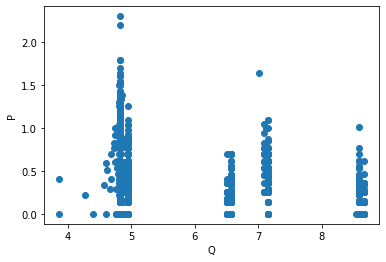

In [ ]:
# All 4 keys combines
plt.scatter(df['price_n'],df['quantity_sold_t'])
plt.xlabel('Q')
plt.ylabel('P')
plt.show()

##5. Fitting the Demand Model  
  
Using regression we can fit a demand model to solve the coefficient problem.  
  
We will fit the model, perform modeling diagnostics and study the coefficients.  
  
Linear models  
* Interpretability
* Underfitting  
* Multicolinarity
* Homoskedasticity 

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

fin_num_col_names = ["price_n", "days_since_launch_n", "store_l4w_sales_n", "store_sales_trend_n", "pa_lw_sales_n", "pa_l4w_sales_n", "pa_sales_trend_n"]
num_col = np.asarray(df.loc[:,fin_num_col_names].copy(), dtype=float)

cat_col_names = ["service_level_c", "month_of_year_c"]
dummies = pd.get_dummies(df.loc[:,cat_col_names].copy(), columns=cat_col_names, drop_first=True)

cat_col = np.asarray(dummies, dtype=float)
print('categorical variables shape', cat_col.shape)

X = np.hstack([num_col, cat_col])
X = sm.add_constant(X)

y = np.asarray(df['quantity_sold_t'].copy())

# ---------- lin-reg calculation ----------
lr = sm.OLS(endog=y, exog=X).fit()
print(lr.summary())

categorical variables shape (2326, 11)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     118.3
Date:                Thu, 17 Mar 2022   Prob (F-statistic):          5.12e-311
Time:                        20:16:20   Log-Likelihood:                -207.15
No. Observations:                2326   AIC:                             452.3
Df Residuals:                    2307   BIC:                             561.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

In [ ]:
X[0] # constant + numerical cols x1-7

array([1.00000000e+00, 8.58912306e+00, 1.94000000e+02, 6.19877593e+03,
       3.75719225e+00, 1.69285714e+02, 4.71851852e+01, 3.58768782e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

Checking for multicollinarity.  
We will check for this and re-fit the model.

In [ ]:
# ---------- VIF calculation ----------
X_num = np.asarray(df.loc[:,fin_num_col_names].copy(), dtype=float).copy()
vif_cols = fin_num_col_names.copy()
vif_data = pd.DataFrame()
vif_data["feature"] = vif_cols
vif_data["VIF"] = [variance_inflation_factor(X_num, i) for i in range(len(vif_cols))]

# ---------- prints of results ------------
print(vif_data)

               feature        VIF
0              price_n  10.567925
1  days_since_launch_n   3.646457
2    store_l4w_sales_n   6.413464
3  store_sales_trend_n  10.987724
4        pa_lw_sales_n  60.330035
5       pa_l4w_sales_n  55.651243
6     pa_sales_trend_n  13.791021


In [ ]:
# Ref code

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#df = data_for_50405164IN_CnC.copy()

fin_num_col_names = ["price_n", "days_since_launch_n", "store_l4w_sales_n", "store_sales_trend_n", "pa_lw_sales_n", "pa_l4w_sales_n", "pa_sales_trend_n"]
num_col = np.asarray(df.loc[:,fin_num_col_names].copy(), dtype=float)

cat_col_names = ["service_level_c", "month_of_year_c"]
dummies = pd.get_dummies(df.loc[:,cat_col_names].copy(), columns=cat_col_names, drop_first=True)

cat_col = np.asarray(dummies, dtype=float)
print('categorical variables shape', cat_col.shape)
 
X = np.hstack([num_col, cat_col])
X = sm.add_constant(X)

y = np.asarray(df['quantity_sold_t'].copy())

# ---------- lin-reg calculation ----------
lr = sm.OLS(endog=y, exog=X).fit() 

# ---------- VIF calculation ----------
X_num = np.asarray(df.loc[:,fin_num_col_names].copy(), dtype=float).copy()
vif_cols = fin_num_col_names.copy()
vif_data = pd.DataFrame()
vif_data["feature"] = vif_cols
vif_data["VIF"] = [variance_inflation_factor(X_num, i) for i in range(len(vif_cols))]

# ---------- prints of results ------------
print(vif_data)
print(lr.summary())

categorical variables shape (182, 12)
               feature        VIF
0              price_n  23.072101
1  days_since_launch_n   3.782922
2    store_l4w_sales_n   3.054358
3  store_sales_trend_n   7.731129
4        pa_lw_sales_n  24.032445
5       pa_l4w_sales_n  28.266177
6     pa_sales_trend_n  20.364284
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     49.76
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.44e-57
Time:                        20:54:42   Log-Likelihood:                -41.481
No. Observations:                 182   AIC:                             123.0
Df Residuals:                     162   BIC:                             187.0
Df Model:                          19                     

##6. Interpretation of Results  
We are building the model to solve a coefficient problem, this means we are interested in studying the coefficient of `price_n`. We used the control variables to improve the fit of the model and are not really interested in the interpretation of these coefficients.  
  
TBD

##7. Application in Retail  
How are the results used in retail business?  
What decisions can be taken and by who?  
  
TBD  

##8. Code References  
TBD

##9. Exercises  
  
7.3  
Tom, Dick and Harry constitute the entire market for scrod.  
  
Tom´s demand curve is given by:  
$${Q_1=100-2P} $$
For `P <= 50`. For `P > 50`, `Q = 0`.   

Dick´s demand curve is given by:
$$Q_2=160-4P $$  
For `P <= 40`. For `P > 50`, `Q = 0`.  
  
Harrys´s demand curve is given by:
$$Q_3=150-5P $$  
For `P <= 30`. For `P > 30`, `Q = 0`.    
  
a) How much scrod is demanded by each person at `P = 50`?  
At `P = 35`? At `P = 25`? At `P = 10`? At `P = 0`?  
b) What is the total market demand for scrod at each of the prices specified in part (a)?  
c) Plot each individual´s demand curve.  
d)  Use the individual demand curves and the results of part (b) to construct the total market dmeand curve for scrod.

In [ ]:
# a

# Define demand functions

def toms_demand(P):
  if P <= 50:
    Q = 100-2*P
    return Q

  else:
    Q = 0
    return Q
  
def dicks_demand(P):
  if P <= 40:
    Q = 160-4*P
    return Q
  
  else:
    Q = 0
    return Q

def harrys_demand(P):
  if P <= 30:
    Q = 150-5*P
    return Q
  
  else:
    Q = 0
    return Q

In [ ]:
import pandas as pd
import numpy as np

# Price list from a)
price_list = [50,35,25,10,0]

# create empty result lists
toms_results = []
dicks_results = []
harrys_results = []

# apply prices to demand functions
for price in price_list:
  Qt, Qd, Qh = toms_demand(price), dicks_demand(price), harrys_demand(price)
  toms_results.append(Qt)
  dicks_results.append(Qd)
  harrys_results.append(Qh)

dict_of_four = {'tom': toms_results,
                 'dick': dicks_results,
                 'harry': harrys_results,
                 'price': price_list}

df = pd.DataFrame(dict_of_four)
df.head()

,tom,dick,harry,price
0,0,0,0,50
1,30,20,0,35
2,50,60,25,25
3,80,120,100,10
4,100,160,150,0


In [ ]:
# b)
total_results = df.agg(sum, axis=1)

dict_of_two = {'total_demand':total_results,
               'price':price_list}

df2 = pd.DataFrame(dict_of_two)
df2.head()

,total_demand,price
0,50,50
1,85,35
2,160,25
3,310,10
4,410,0


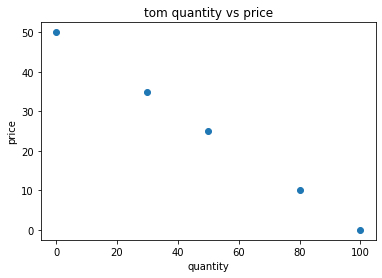

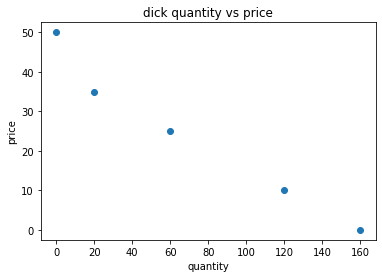

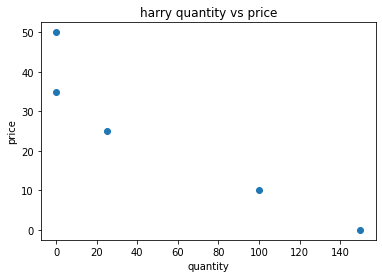

In [ ]:
# c)
import matplotlib.pyplot as plt

plt.scatter(x=df['tom'],y=df['price'])
plt.title('tom quantity vs price')
plt.xlabel('quantity')
plt.ylabel('price')
plt.show()

plt.scatter(x=df['dick'],y=df['price'])
plt.title('dick quantity vs price')
plt.xlabel('quantity')
plt.ylabel('price')
plt.show()

plt.scatter(x=df['harry'],y=df['price'])
plt.title('harry quantity vs price')
plt.xlabel('quantity')
plt.ylabel('price')
plt.show()

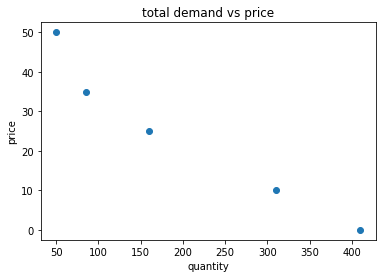

In [ ]:
# d)

plt.scatter(x=df2['total_demand'],y=df['price'])
plt.title('total demand vs price')
plt.xlabel('quantity')
plt.ylabel('price')
plt.show()